Ở chương 8 ta đã xem xét các nhiệm vụ học không giám sát phổ biến nhất: dimensionality reduction. Sau đây là một số các nhiệm vụ học không giám sát khác

**Clustering**

Mục tiêu là nhóm các thực thể tương tự lại với nhau thành các cụm (clusters).
Phân cụm là một công cụ tuyệt vời cho các ứng dụng như:

- Phân tích dữ liệu,
- Phân khúc khách hàng,
- Hệ thống gợi ý,
- Công cụ tìm kiếm,
- Phân đoạn hình ảnh,
- Học bán giám sát,
- Giảm số chiều dữ liệu, và còn nhiều hơn nữa.

**Anomaly detection (Phát hiện bất thường – còn gọi là phát hiện ngoại lệ)**

Mục tiêu là học xem dữ liệu “bình thường” trông như thế nào, và từ đó phát hiện ra những điểm bất thường. Các điểm này được gọi là anomalies hoặc outliers (dị biệt), trong khi những điểm bình thường được gọi là inliers.

Phát hiện bất thường rất hữu ích trong nhiều ứng dụng, ví dụ như:
- Phát hiện gian lận,
- Phát hiện sản phẩm lỗi trong sản xuất,
- Xác định xu hướng mới trong chuỗi thời gian,
- Loại bỏ ngoại lệ khỏi bộ dữ liệu trước khi huấn luyện mô hình khác (có thể giúp cải thiện hiệu suất của mô hình rất nhiều).

**Density estimation (Ước lượng mật độ)**

Đây là nhiệm vụ ước lượng hàm mật độ xác suất (probability density function - PDF) của quá trình ngẫu nhiên đã sinh ra bộ dữ liệu.

Ước lượng mật độ thường được dùng cho phát hiện bất thường:
→ Những điểm dữ liệu nằm trong vùng có mật độ rất thấp thường là điểm dị biệt (anomalies).

Nó cũng rất hữu ích cho:
- Phân tích dữ liệu,
- Trực quan hóa dữ liệu.

# Clustering Algorithms: k-means and DBSCAN


Khi bạn đang đi dạo trong núi, bạn tình cờ bắt gặp một loài cây mà bạn chưa từng thấy trước đây. Bạn nhìn xung quanh và thấy thêm vài cây nữa. Chúng không hoàn toàn giống hệt nhau, nhưng đủ giống để bạn biết rằng chúng rất có thể thuộc cùng một loài (hoặc ít nhất là cùng một chi).
Bạn có thể cần một nhà thực vật học để xác định chúng thuộc loài nào, nhưng bạn chắc chắn không cần chuyên gia để nhận ra nhóm các vật thể trông giống nhau.
Việc này gọi là phân cụm (clustering): nhiệm vụ nhận diện các điểm dữ liệu tương tự và gán chúng vào các cụm (clusters) — tức là các nhóm có các điểm tương tự nhau.

Giống như trong phân loại (classification), mỗi điểm dữ liệu được gán vào một nhóm. Tuy nhiên, khác với phân loại, phân cụm là một nhiệm vụ học không giám sát (unsupervised learning).

In [47]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

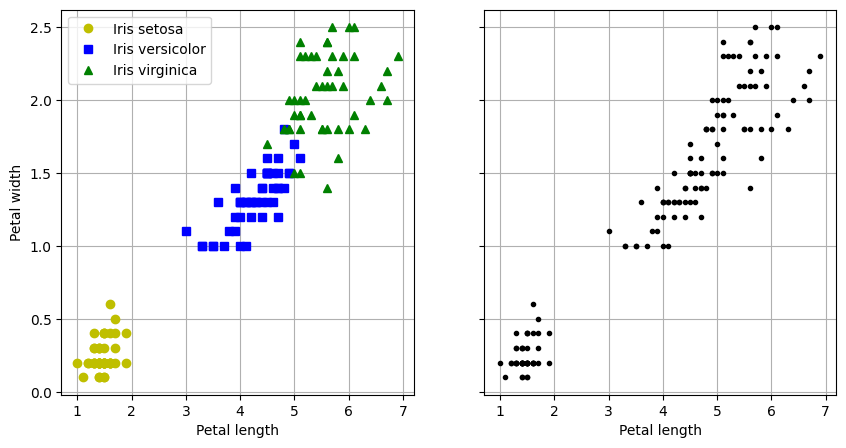

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid(True)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()


HÌnh bên trái là tập dữ liệu iris có được gắn nhãn, thích hợp cho các thuật toán phân loại như Logistic Regression, SVMs, hoặc Random Forests. Hình bên phải cùng tập dữ liệu nhưng không có nhãn nên không thể sử dụng các thuật toán phân loại. 

Đây là lúc các thuật toán phân cụm phát huy hiệu quả. Ta có thể thấy
- Cụm phía dưới bên trái
- Cụm phía trên bên phải có hai cụm con khó phân biệt hơn

Thực tế là tập dữ liệu có hai đặc trưng khác (Sepal length và Sepal width) không được hiển thị ở đây, và các thuật toán phân cụm có thể khai thác tất cả các đặc trưng, nên chúng vẫn xác định được 3 cụm khá chính xác.


Phân cụm được ứng dụng rất rộng rãi bao gồm:


    Customer segmentation (Phân khúc khách hàng)

Bạn có thể phân cụm khách hàng của mình dựa trên lịch sử mua hàng và hoạt động của họ trên trang web. Điều này giúp bạn hiểu khách hàng là ai và họ cần gì, từ đó bạn có thể điều chỉnh sản phẩm và chiến dịch tiếp thị phù hợp với từng phân khúc.
Ví dụ, việc phân khúc khách hàng có thể rất hữu ích trong hệ thống gợi ý (recommender systems) để đề xuất những nội dung mà người dùng trong cùng một cụm thường thích.


    Phân tích dữ liệu (Data analysis)

Khi phân tích một tập dữ liệu mới, việc chạy một thuật toán phân cụm trước, sau đó phân tích từng cụm riêng biệt, có thể rất hữu ích.


    Giảm chiều dữ liệu (Dimensionality reduction)

Khi một tập dữ liệu đã được phân cụm, ta thường có thể đo được độ tương thích (affinity) của mỗi điểm dữ liệu với từng cụm — tức là mức độ mà điểm đó “phù hợp” với từng cụm.
Vector đặc trưng x của mỗi điểm dữ liệu sau đó có thể được thay thế bằng vector thể hiện độ tương thích của nó với các cụm.
Nếu có k cụm, thì vector mới là vector k chiều. Vector mới này thường có số chiều ít hơn nhiều so với vector đặc trưng ban đầu, nhưng vẫn giữ được thông tin đủ để xử lý tiếp.

    Kỹ thuật trích xuất đặc trưng (Feature engineering)

Các độ tương thích với cụm có thể được dùng như những đặc trưng phụ trợ.
Ví dụ, chúng ta đã dùng k-means trong Chương 2 để thêm đặc trưng tương thích địa lý vào tập dữ liệu nhà ở California, và điều này giúp cải thiện hiệu suất mô hình.

    Phát hiện bất thường (Anomaly detection / outlier detection)

Bất kỳ điểm dữ liệu nào có độ tương thích thấp với tất cả các cụm đều có khả năng là bất thường.
Ví dụ, nếu bạn phân cụm người dùng của website theo hành vi, bạn có thể phát hiện người dùng có hành vi bất thường, như số lượng yêu cầu trên giây cao bất thường.

    Học bán giám sát (Semi-supervised learning)

Nếu bạn chỉ có một vài nhãn (label), bạn có thể thực hiện phân cụm và truyền nhãn cho tất cả các mẫu thuộc cùng một cụm.
Kỹ thuật này có thể tăng đáng kể số lượng nhãn cho thuật toán học có giám sát sau đó, từ đó cải thiện hiệu suất mô hình.

    Công cụ tìm kiếm (Search engines)

Một số công cụ tìm kiếm cho phép bạn tìm hình ảnh tương tự với một hình ảnh mẫu.
Để xây dựng hệ thống như vậy, bạn sẽ áp dụng thuật toán phân cụm lên toàn bộ hình ảnh trong cơ sở dữ liệu: các ảnh giống nhau sẽ rơi vào cùng một cụm.
Khi người dùng cung cấp một ảnh mẫu, bạn chỉ cần sử dụng mô hình phân cụm đã huấn luyện để tìm cụm của ảnh đó, và trả về tất cả các ảnh trong cùng cụm.

    Phân đoạn ảnh (Image segmentation)
Bằng cách phân cụm các điểm ảnh theo màu sắc, sau đó thay thế màu từng điểm ảnh bằng màu trung bình của cụm mà nó thuộc về, ta có thể giảm đáng kể số lượng màu trong ảnh.
Phân đoạn ảnh được sử dụng trong nhiều hệ thống phát hiện và theo dõi đối tượng, vì nó giúp xác định viền của mỗi vật thể dễ dàng hơn.

Không có một định nghĩa duy nhất nào cho cụm là gì: nó phụ thuộc vào ngữ cảnh, và các thuật toán khác nhau sẽ phát hiện các loại cụm khác nhau.

- Một số thuật toán tìm các mẫu dữ liệu tập trung quanh một điểm — gọi là trung tâm (centroid).

- Một số khác tìm vùng dày đặc các điểm dữ liệu gần nhau — các cụm này có thể có hình dạng bất kỳ.

- Một số thuật toán có tính chất phân cấp, tìm các cụm của các cụm. Và còn nhiều loại khác nữa.



## k-means

In [49]:
# generate data

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)


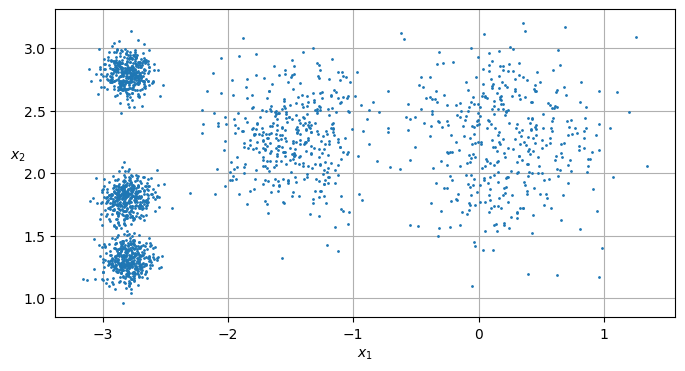

In [50]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [51]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=5)
y_pred = kmeans.fit_predict(X)
y_pred


array([0, 2, 1, ..., 3, 1, 2], dtype=int32)

In [52]:
y_pred is kmeans.labels_

True

In [53]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348]])

In [54]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

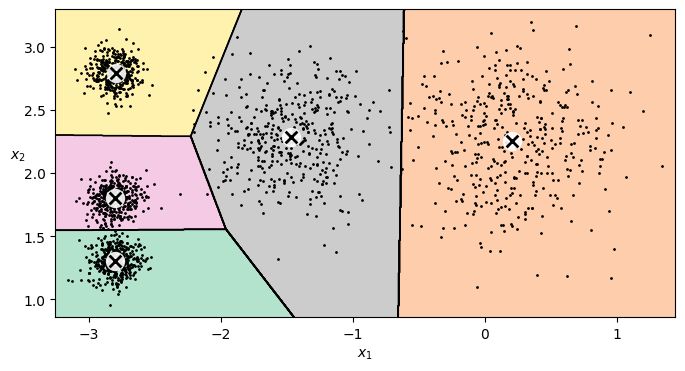

In [55]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Hard Clustering vs Soft Clustering

Phần lớn các mẫu đều được gán đúng vào cụm tương ứng, nhưng một vài mẫu có thể đã bị gán sai, đặc biệt là gần ranh giới giữa cụm phía trên bên trái và cụm trung tâm. Thật vậy, thuật toán k-means hoạt động không tốt khi các cụm có đường kính rất khác nhau, vì nó chỉ quan tâm đến khoảng cách từ mẫu đến tâm cụm (centroid) khi quyết định gán cụm. Thay vì gán mỗi mẫu vào duy nhất một cụm (gọi là **hard clustering**), có thể hữu ích nếu gán cho mỗi mẫu một điểm số cho từng cụm, gọi là **soft clustering**. Điểm số này có thể là khoảng cách giữa mẫu và tâm cụm, hoặc điểm số tương đồng (affinity), ví dụ như hàm Gaussian RBF đã được dùng ở Chương 2.

In [56]:
# kmeans.transform is used to get the distance to the centroid of each cluster

kmeans.transform(X_new).round(2)


array([[2.89, 0.33, 2.81, 2.9 , 1.49],
       [5.84, 2.8 , 5.81, 5.85, 4.48],
       [1.71, 3.29, 1.21, 0.29, 1.69],
       [1.22, 3.22, 0.73, 0.36, 1.55]])

Nếu có một tập dữ liệu nhiều chiều, sau khi biến đổi theo cách này, ta sẽ thu được một tập dữ liệu k-chiều (k là số cụm). Ngoài ra khoảng cách này có thể được sử dụng là feature phụ cho việc huấn luyện mô hình khác.

### The k-means algorithm

Giả sử bạn đã có sẵn các tâm cụm (centroids). Khi đó, bạn có thể dễ dàng gán nhãn cho tất cả các điểm trong tập dữ liệu bằng cách gán mỗi điểm vào cụm có tâm gần nhất.

Ngược lại, nếu bạn có sẵn nhãn cho tất cả các điểm, bạn cũng có thể tính được tâm cụm bằng cách tính trung bình các điểm thuộc cụm đó.
Nhưng trong thực tế bạn không có cả nhãn lẫn tâm cụm, vậy làm thế nào?

Hãy khởi tạo ngẫu nhiên các tâm cụm (ví dụ, chọn ngẫu nhiên k điểm trong dữ liệu và dùng vị trí của chúng làm tâm cụm ban đầu). Sau đó:

1. Gán nhãn cho các điểm (dựa trên tâm cụm gần nhất),
2. Cập nhật lại tâm cụm (tính trung bình của các điểm trong cụm),
3. Lặp lại việc gán nhãn và cập nhật tâm cụm cho đến khi tâm cụm không còn thay đổi.

Thuật toán được đảm bảo hội tụ sau một số bước hữu hạn (thường khá ít). Lý do là vì khoảng cách bình phương trung bình giữa các điểm và tâm cụm gần nhất chỉ có thể giảm hoặc giữ nguyên sau mỗi bước, và vì giá trị này không thể âm, nên thuật toán chắc chắn sẽ hội tụ




**Note:** độ phức tạp tính toán của thuật toán thường tuyến tính theo số lượng instances $m$, số lượng features $n$, và số lượng cụm $k$.


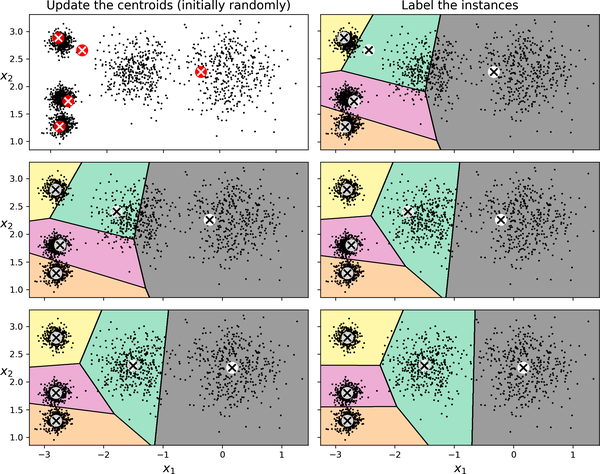

Mặc dù thuật toán có thể được đảm bảo sẽ hội tụ, nhưng có thể sự hội tụ không phải là kết quả đúng (có thể hội tụ ở local minimum): nó phụ thuộc vào các điểm tâm khởi tạo

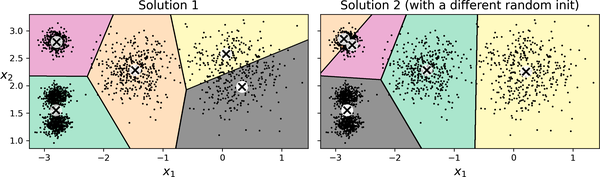

Hãy cùng xem xét một số cách bạn có thể giảm thiểu rủi ro này bằng cách cải thiện khởi tạo tâm

### Centroid initialization methods

In [57]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

Một cách khác là chạy thuật toán nhiều lần với các tâm khơi tạo khác nhau. Nó được kiểm soát bởi `n_init` hyperparameter

In [58]:
# which is the sum of the squared distances between the instances and their closest centroids

kmeans.inertia_

211.59853725816836

In [59]:
kmeans.score(X)

-211.59853725816836

Một cải tiến quan trọng đối với thuật toán k-means, k-means++. Một cách khởi tạo thông minh hơn, có xu hướng chọn các tâm cụm (centroid) ở xa nhau, và cải tiến này làm cho thuật toán k-means ít có khả năng hội tụ đến một giải pháp dưới mức tối ưu. Thuật toán khởi tạo k-means++ hoạt động như sau:

1. Chọn một tâm $\mathbf{c}^{(1)}$ ngẫu nhiên từ tập dữ liệu
2. Chọn tâm cụm mới $\mathbf{c}^{(i)}$, chọn một mẫu $\mathbf{x}^{(i)}$ với xác suất $D(\mathbf{x}^{(i)})^2 / \sum^{m}_{j=1} D(\mathbf{x}^{(j)})^2$, với $D(\mathbf{x}^{(i)})$ là khoảng cách mẫu $\mathbf{x}^{(i)}$ và tâm gần nhất đã được chọn. Phân phối xác suất này đảm bảo rằng các trường hợp ở xa tâm đã chọn hơn có nhiều khả năng được chọn làm tâm hơn.
3. Lặp lại đến khi chọn được $k$ tâm


Class `KMeans` sử dụng thuật toán này khi khởi tạo mặc định

### Accelerated k-means and mini-batch k-means

Một cách khác để cải thiện thuật toán k-means. Trong một số bộ dữ liệu rất lớn Trên các tập dữ liệu lớn có nhiều cụm, thuật toán có thể được tăng tốc bằng cách tránh nhiều phép tính khoảng cách không cần thiết. Elkan đã đạt được điều này bằng cách khai thác bất đẳng thức tam giác (tức là, một đường thẳng luôn là khoảng cách ngắn nhất giữa hai điểm) và bằng cách theo dõi các giới hạn trên và dưới cho khoảng cách giữa các điểm và các tâm cụm. Tuy nhiên, thuật toán của Elkan không phải lúc nào cũng tăng tốc độ huấn luyện, và đôi khi nó còn có thể làm chậm quá trình huấn luyện một cách đáng kể; điều này phụ thuộc vào tập dữ liệu. Dù vậy, nếu bạn muốn thử, hãy đặt tham số `algorithm="elkan"`

Một cải tiến quan trọng khác của thuật toán k-means đã được đề xuất trong một bài báo năm 2010 của David Sculley. Thay vì sử dụng toàn bộ tập dữ liệu ở mỗi vòng lặp, thuật toán này sử dụng các lô nhỏ (mini-batches), di chuyển các tâm cụm một chút ở mỗi vòng lặp. Điều này giúp tăng tốc thuật toán (thường nhanh hơn từ ba đến bốn lần) và giúp ta có thể phân cụm các tập dữ liệu khổng lồ không vừa trong bộ nhớ. Scikit-Learn triển khai thuật toán này trong lớp `MiniBatchKMeans`, mà bạn có thể sử dụng tương tự như lớp `KMeans`

In [60]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

Nếu tập dữ liệu không vừa trong bộ nhớ, lựa chọn đơn giản nhất là sử dụng phương thức memmap như chúng ta đã làm cho Incremental PCA. Hoặc, bạn có thể truyền từng lô nhỏ một vào phương thức `partial_fit()`, nhưng cách này sẽ cần nhiều công sức hơn, vì bạn sẽ cần thực hiện nhiều lần khởi tạo và tự mình chọn ra lần tốt nhất.

Mặc dù thuật toán mini-batch k-means nhanh hơn nhiều so với thuật toán k-means thông thường, nhưng quán tính (inertia) của nó lại tệ hơn một chút.

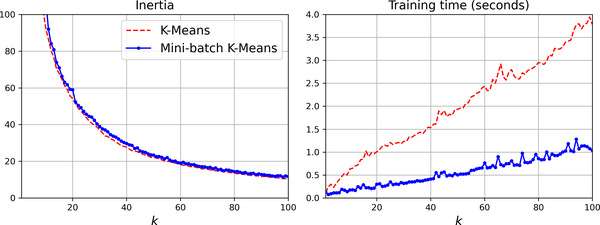

### Finding the optimal number of clusters

Đến nay, chúng ta đã đặt số cụm k bằng 5 vì khi nhìn vào dữ liệu, có thể thấy rõ đây là số cụm chính xác. Nhưng nhìn chung, việc xác định giá trị cho k sẽ không dễ dàng như vậy, và kết quả có thể sẽ khá tệ nếu bạn đặt sai giá trị. Như hình dưới đây với tập dữ liệu này, việc đặt k bằng 3 hoặc 8 đều cho ra các mô hình khá tệ.

Ta nghĩ rằng chỉ cần chọn mô hình có quán tính (inertia) thấp nhất, nhưng với k = 8 inertia = 119.1, chỉ số này không phải một chỉ số hiệu suất tốt vì nó sẽ giảm khi k tăng. Thật vậy, càng có nhiều cụm, mỗi điểm dữ liệu sẽ càng gần với tâm cụm gần nhất của nó, và do đó quán tính sẽ càng thấp.

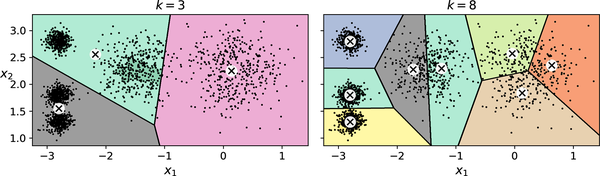

Hãy vẽ biểu đồ quán tính như một hàm của k. Khi làm vậy, đường cong thường chứa một điểm uốn được gọi là điểm khuỷu (elbow)

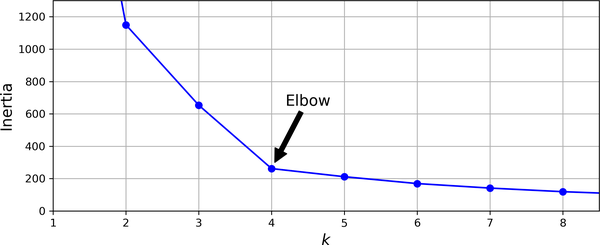

Như bạn có thể thấy, quán tính (inertia) giảm rất nhanh khi chúng ta tăng k lên đến 4, nhưng sau đó nó giảm chậm hơn nhiều khi chúng ta tiếp tục tăng k. Đường cong này có hình dạng gần giống một cánh tay, và có một điểm khuỷu (elbow) tại k = 4. Vì vậy, nếu chúng ta không biết rõ hơn, chúng ta có thể nghĩ rằng 4 là một lựa chọn tốt: bất kỳ giá trị nào thấp hơn sẽ không hiệu quả bằng, trong khi bất kỳ giá trị nào cao hơn sẽ không giúp ích được nhiều, và chúng ta có thể chỉ đang chia tách các cụm vốn đã hoàn hảo ra làm đôi mà không có lý do chính đáng.

Kỹ thuật chọn giá trị tốt nhất cho số cụm này khá là sơ lược. Một cách tiếp cận chính xác hơn (nhưng cũng tốn kém hơn về mặt tính toán) là sử dụng silhouette score, đây là giá trị trung bình của hệ số silhouette (silhouette coefficient) trên tất cả các điểm dữ liệu. Hệ số silhouette của một điểm dữ liệu được tính bằng công thức `(b - a) / max(a, b)`, trong đó a là khoảng cách trung bình đến các điểm khác trong cùng một cụm (tức là, khoảng cách trung bình nội cụm - mean intra-cluster distance) và b là khoảng cách trung bình đến các điểm của cụm gần nhất tiếp theo (mean nearest-cluster distance), được định nghĩa là cụm tối thiểu hóa giá trị b, không bao gồm cụm của chính điểm dữ liệu đó.

Hệ số silhouette có thể thay đổi từ -1 đến +1. Một hệ số gần với +1 có nghĩa là điểm dữ liệu nằm sâu bên trong cụm của nó và ở xa các cụm khác. Trong khi đó, một hệ số gần với 0 có nghĩa là nó nằm gần ranh giới của một cụm. Cuối cùng, một hệ số gần với -1 có nghĩa là điểm dữ liệu đó có thể đã bị gán nhầm cụm.

Để tính toán điểm silhouette, bạn có thể sử dụng hàm silhouette_score() của Scikit-Learn, cung cấp cho nó tất cả các điểm dữ liệu trong tập dữ liệu và các nhãn đã được gán.

In [61]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)

np.float64(0.655517642572828)

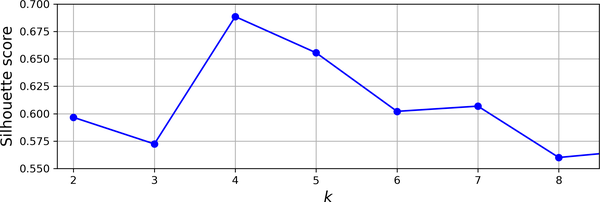

Biểu đồ này cũng cho thấy k = 4 là một lựa chọn rất tốt, và cũng làm nổi bật rằng k = 5 tốt hơn nhiều k = 6. 7 điều này không thây được thông qua biểu đồ inertia

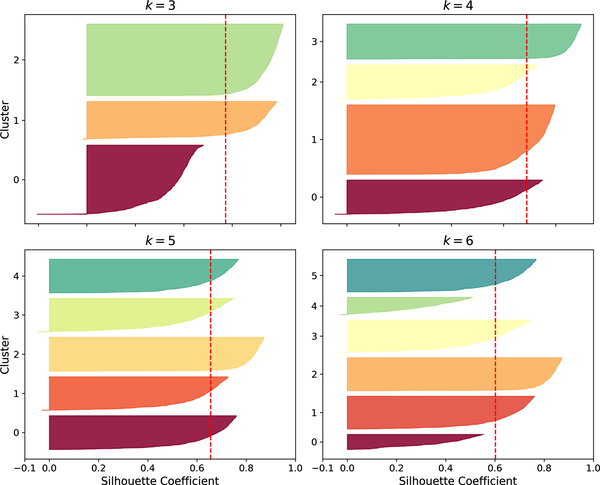

## Limit of k-means

Mặc dù có nhiều ưu điểm, đáng chú ý nhất là nhanh và có thể mở rộng, k-means không hoàn hảo. Như chúng ta đã thấy, cần phải chạy thuật toán nhiều lần để tránh các giải pháp không tối ưu, cộng với việc bạn cần chỉ định số lượng cụm, điều này có thể khá rắc rối. Hơn nữa, k-means không hoạt động tốt khi các cụm có kích thước khác nhau, mật độ khác nhau hoặc hình dạng không phải hình cầu.

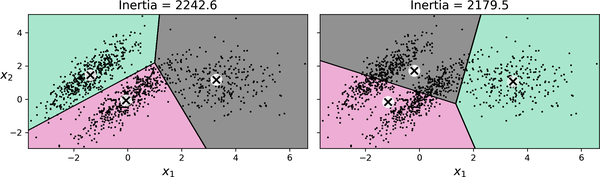

Cả 2 giải pháp đều không tốt, tùy thuộc vào dữ liệu, các thuật toán phân cụm khác nhau có thể hoạt động tốt hơn. Trên các loại cụm hình elip này, các mô hình hỗn hợp Gaussian hoạt động rất tốt.

**Lưu ý:** việc scale dữ liệu trước khi chạy k-means là rất quan trọng, hoặc các cụm sẽ bị kéo dài rất nhiều và k-means hoạt động kém. Việc scale các feature không đảm bảo các cụm sẽ đẹp và có dạng cầu nhưng nhìn chung nó có thể giúp k-means cải thiện một chút

## Using Clustering for Image Segmentation

**Image Segmentation** là nhiệm vụ phân chia hình ảnh thành nhiều phân đoạn, có một số biến thế như:

- Trong **color segmentation**, các pixel có màu tương tự được gán cho cùng một phân đoạn. Điều này hữu ích trong nhiều ứng dụng. Ví dụ, nếu bạn muốn phân tích hình ảnh vệ tinh để đo tổng diện tích rừng trong một khu vực, phân đoạn màu có thể là giải pháp tốt

- Trong **semantic segmentation**, tất cả các pixel là một phần của cùng một loại đối tượng được gán cho cùng một phân đoạn. Ví dụ, trong hệ thống thị giác của xe tự lái, tất cả các pixel là một phần của hình ảnh người đi bộ có thể được gán cho phân đoạn "người đi bộ" (sẽ có một phân đoạn chứa tất cả người đi bộ).



Sau đây sẽ là bài toán phân loại màu đơn giản

In [62]:
import PIL

filepath = r'.\images\unsuperviesd_learning\ladybug.png'
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [63]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)



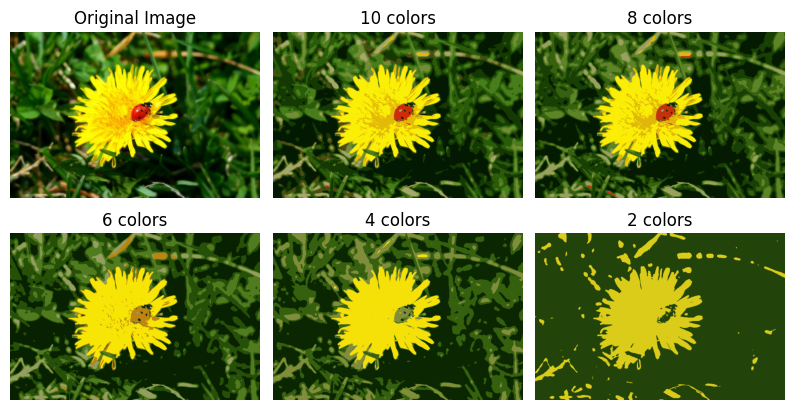

In [64]:
segmented_imgs = []

n_colors = (10, 8, 6, 4, 2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

for idx, n_cluster in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_cluster} colors")
    plt.axis('off')

plt.show()

## Using Clustering for Semi-Supervised Learning

Một trường hợp khác sử dụng clustering là học bán giám sát, khi chúng ta có đa số là các mẫu không nhãn, chỉ một ít có nhãn

In [69]:
# using mini-MNIST

from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

Chúng ta sẽ giả sử chúng ta chỉ có nhãn cho 50 trường hợp. Để có được baseline, hãy đào tạo một mô hình hồi quy logistic trên 50 trường hợp được gắn nhãn này:

In [77]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [78]:
log_reg.score(X_test, y_test)

0.7581863979848866

Độ chính xác chỉ đạt 76%. -> Cải thiện nó với cluster.

In [107]:
# cluster training set with k=50. Then each cluster find the closest image and call it is *representative images*

k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) # contains the distance to each cluster center
representative_digit_idx = X_digits_dist.argmin(axis=0) # index of the closest image to each cluster center
X_representative_digits = X_train[representative_digit_idx] # representative images

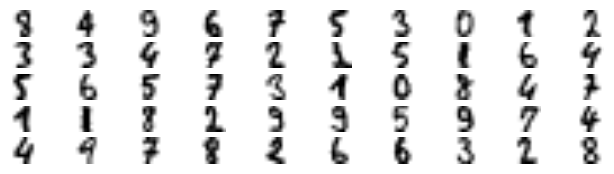

In [94]:
plt.figure(figsize=(8, 2))
for index, representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(representative_digit.reshape(8, 8), cmap='binary', interpolation='bilinear')
    plt.axis('off')

plt.show()

In [99]:
y_representative_digits = np.array([
    8, 4, 9, 6, 7, 5, 3, 0, 1, 2,
    3, 3, 4, 7, 2, 1, 5, 1, 6, 4,
    5, 6, 5, 7, 3, 1, 0, 8, 4, 7,
    1, 1, 8, 2, 9, 9, 5, 9, 7, 4,
    4, 4, 7, 8, 2, 6, 6, 3, 2, 8
])

In [101]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

# train with center of each cluster performance is slightly better

0.8488664987405542

Giả sử gán tất cả các phân từ trong cụm bằng nhãn của tâm cụm

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [105]:
log_reg = LogisticRegression(max_iter=10_000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8413098236775819

In [108]:
# ignoring 1% instances that are farthest from their cluster center (maybe that are outliers)

percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [109]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8513853904282116

In [110]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

np.float64(0.9444444444444444)

## DBSCAN

Thuật toán `density-based spatial clustering of applications with noise (DBSCAN)` định nghĩa các cụm là các vùng liên tục có mật độ cao. Sau đây là cách thức hoạt động của nó:

- Với mỗi mẫu, thuật toán đếm có bao nhiêu mẫu khác nằm trong khoảng cách nhỏ hơn $ε$ từ nó. Vùng này được gọi là `ε-neighborhood` của mẫu đó

- Nếu một mẫu có ít nhất `min_samples` mẫu nằm trong `ε-neighborhood` (bao gồm chính nó) thì nó được gọi là mẫu gốc `(core instance)`. Mặt khác, các mẫu gốc là các mẫu nằm trong vùng dày đặc (mật độ cao)

- Tất cả các mẫu là lân cận của mẫu gốc được nằm cùng một cụm. Vùng lân cận này có thể bao gồm các mẫu gốc khác; do đó, một chuỗi dài các mẫu gốc lân cận tạo thành một cụm duy nhất

- Bất kỳ mẫu nào không là mẫu gốc và không thuộc lân cận của mẫu nào thì có thể coi là một bất thường (`anomaly` hay `outlier`) 

Thuật toán này hoạt động tốt nếu tất cả các cụm được tách biệt tốt bởi các vùng có mật độ thấp

In [113]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_[:10]

# -1 is considered as anomalies

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [117]:
# core instances
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [118]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

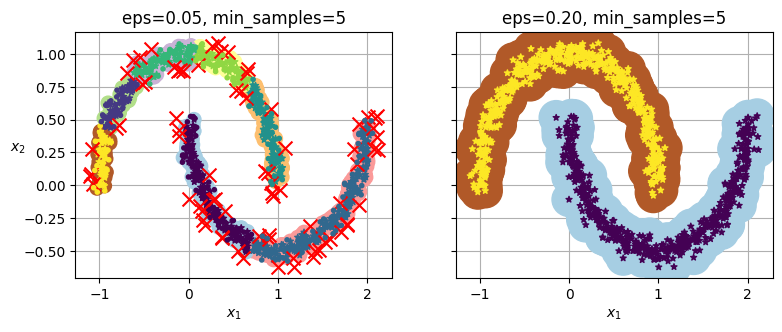

In [123]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    annomalies_mask = (dbscan.labels_ == -1)
    non_core_mask = ~core_mask & ~annomalies_mask

    cores = dbscan.components_
    non_cores = X[non_core_mask]
    anomalies = X[annomalies_mask]

    plt.scatter(cores[:, 0], cores[:, 1], s=size, c=dbscan.labels_[core_mask],
                marker='o', cmap='Paired')
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)


dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Với eps = 0.05 kết quả thu được 7 cluster, chưa hợp lí lắm và có dấu hiệu underfit, sau khi tăng eps = 0.2, ta có thể thu được cluster trông khá chính xác.

Tuy nhiên `DBSCAN` không có hàm `predict()` mặc dù nó có `fit_predict()` có nghĩa là ta không thể dự đoán một mẫu mới sẽ thuộc vào cluster nào.

In [126]:
# train KNeighborsClassifier: to predict new instances
dbscan = dbscan2

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [127]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

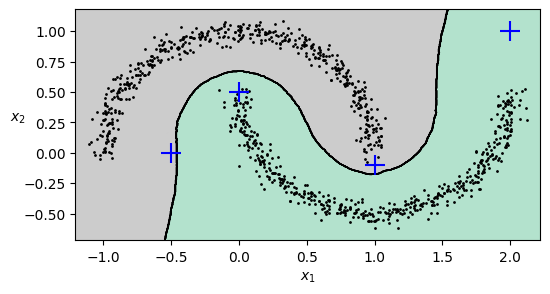

In [129]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c='b', marker='+', s=200, zorder=10)

In [130]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

## Other Clustering Algorithms

### 1. Spectral clustering (Phân cụm phổ)

Thuật toán này nhận vào một ma trận độ tương đồng giữa các điểm và tạo ra một biểu diễn không gian thấp chiều hơn từ đó (tức là giảm số chiều của ma trận). Sau đó, thuật toán sẽ sử dụng một thuật toán phân cụm khác trong không gian thấp chiều này (trong thư viện Scikit-Learn, thuật toán được dùng là k-means).

**Spectral clustering** có thể:

- Phát hiện các cấu trúc phân cụm phức tạp,

- Dùng để cắt đồ thị, ví dụ: xác định các cụm bạn bè trong mạng xã hội.

Tuy nhiên:

- Thuật toán không mở rộng tốt với số lượng lớn điểm dữ liệu,

- Hoạt động không hiệu quả khi các cụm có kích thước rất khác nhau.

In [131]:
from sklearn.cluster import SpectralClustering
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

sc1.affinity_matrix_.round(2)

array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0.3, ..., 0. , 0. , 0. ],
       [0. , 0.3, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [132]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

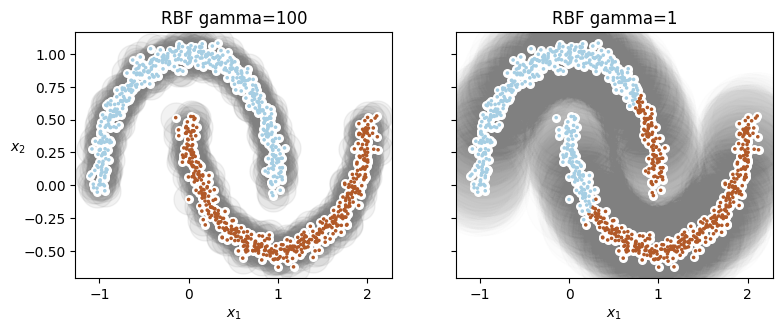

In [133]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True,
                             show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"RBF gamma={sc.gamma}")


plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### 2. Agglomerative clustering (Phân cụm kết tụ)

Một hệ thống phân cấp các cụm được xây dựng từ dưới lên. Hãy tưởng tượng nhiều bong bóng nhỏ trôi nổi trên mặt nước và dần dần kết dính vào nhau cho đến khi tạo thành một nhóm bong bóng lớn. Tương tự, trong mỗi vòng lặp, Agglomerative clustering sẽ kết nối hai cụm gần nhau nhất (bắt đầu từ từng điểm riêng lẻ). Nếu bạn vẽ một cây mà mỗi nhánh biểu diễn cho một cặp cụm được hợp nhất, bạn sẽ có một cây nhị phân các cụm, trong đó các lá là các điểm dữ liệu ban đầu.

**Cách tiếp cận này có thể:**

- Nhận dạng các cụm có hình dạng đa dạng

- Tạo ra một cây phân cụm linh hoạt và giàu thông tin, thay vì buộc bạn phải chọn trước một số cụm cố định

- Sử dụng được với bất kỳ loại khoảng cách nào giữa các điểm.

Nó cũng có thể mở rộng tốt đối với tập dữ liệu lớn nếu bạn cung cấp ma trận kết nối `(connectivity matrix)` — một ma trận thưa m × m cho biết cặp điểm nào là hàng xóm (ví dụ, tạo ra bởi hàm `sklearn.neighbors.kneighbors_graph()`). Tuy nhiên, nếu không có ma trận kết nối, thuật toán không hoạt động hiệu quả với tập dữ liệu lớn.

In [145]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

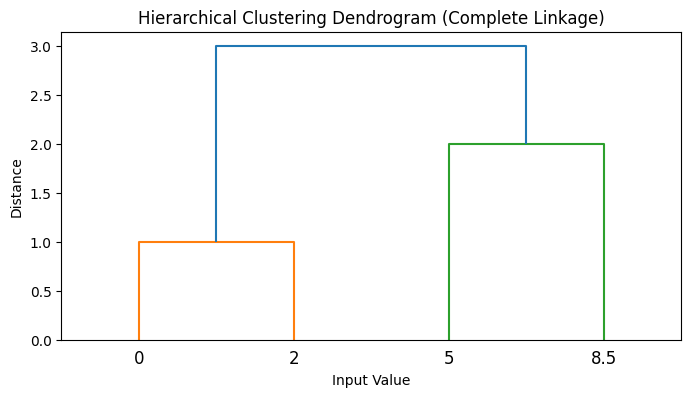

In [ ]:
def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, (left, right) in enumerate(model.children_):
        count = 0
        if left < n_samples:
            count += 1 
        else:
            count += counts[left - n_samples]
        if right < n_samples:
            count += 1
        else:
            count += counts[right - n_samples]
        counts[i] = count

    distances = np.arange(1, model.children_.shape[0]+1)
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    return linkage_matrix

linkage_matrix = create_linkage_matrix(agg)
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, labels=[0, 2, 5, 8.5])
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Input Value")
plt.ylabel("Distance")
plt.show()

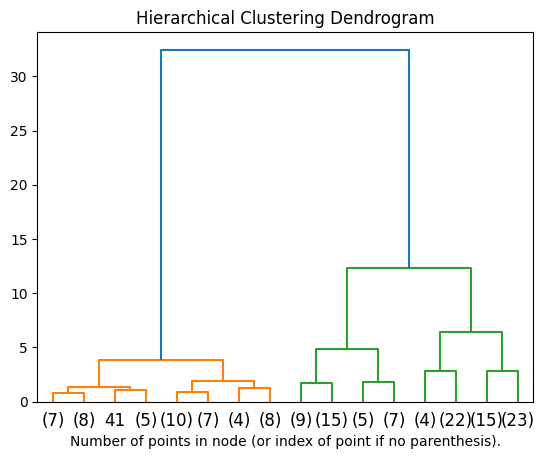

In [141]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



iris = load_iris()
X = iris.data


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### 3. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

**Ưu điểm**

- Rất hiệu quả với dữ liệu lớn.

- Sử dụng ít bộ nhớ (không lưu toàn bộ dữ liệu).

- Có thể nhanh hơn k-means với kết quả tương đương.

**Nhược điểm:**

- Không phù hợp khi số lượng đặc trưng (features) lớn (>20).

- Chỉ hiệu quả khi dữ liệu có cấu trúc phân cụm rõ ràng.

### 4. Mean-Shift

**Cách hoạt động:**

- Tạo các vòng tròn quanh mỗi điểm, dịch chuyển chúng dần về trung tâm mật độ cao hơn cho đến khi hội tụ.

**Ưu điểm:**

- Không cần chỉ định số cụm trước.

- Có thể tìm cụm có hình dạng bất kỳ.

**Nhược điểm:**

- Nhạy cảm với tham số bandwidth.

- Dễ phân cụm sai khi có nhiều mật độ khác nhau.

- Tính toán phức tạp $𝑂(𝑚^2𝑛)$ → không phù hợp với dữ liệu lớn.



### 5. Affinity Propagation

**Cách hoạt động:**

- Các điểm trao đổi thông tin với nhau để chọn ra những điểm đại diện (exemplars).

- Không cần chỉ định số cụm trước.

**Ưu điểm:**

- Xác định số lượng cụm tự động.

- Tốt với cụm có kích thước khác nhau.

**Nhược điểm:**

- Tính toán phức tạp $𝑂(𝑛^2)$

- Không phù hợp với dữ liệu lớn.

# Gaussian Mixtures

**Gaussian Mixture Model (GMM) là gì ?**

- Là một mô hình xác suất

- Giả định rằng dữ liệu được tạo ra từ một hỗn hợp của nhiều phân phối Gaussian (thường gọi là phân phối chuẩn hoặc phân phối chuông đồ thị có hình chuông).

- Mội phân phối Gaussian đại diện cho một cụm

- Các cụm này có thể có hình elip với hình dạng, mật độ và hướng khác nhau. Ví dụ như hình dưới

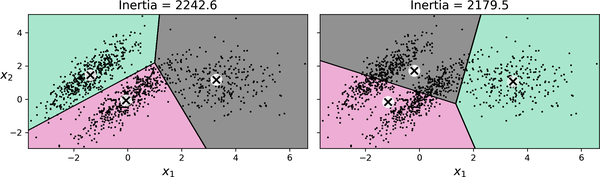

Có nhiều biến thể của GMM. Biến thể đơn giản nhất được triển khai bởi lớp `GaussianMixture`. Ta phải biết trước số cụm của phân phối Gaussian. Giả sử tập dữ liệu $\mathbf{X}$ được sinh ra từ quá trình xác suất sau:

1. Chọn cụm:

    - Với mỗi mẫu, được gán ngẫu nhiên vào 1 trong $k$ cụm.
    - Xác suất chọn cụm $j^{th}$ là trọng số của cụm $\phi^{(j)}$
    - Kí hiệu chỉ số cụm của điểm thứ $i$ là $z^{(i)}$

2. Sinh điểm:
    - Nếu điểm thứ $i^{th}$ được gán vào cụm $j^{th}$. (Tức là: $z^{(i)} = j$) thì vị trí $\mathbf{x}^{(i)}$ của nó được sinh ra từ một phân phối Gaussian với
        - Mean: $\mathbf{\mu}^{(j)}$ 
        - Covariance: $\mathbf{\Sigma}^{(j)}$ (Ma trận hiệp phương sai)
    - Được viết tắt là: $\mathbf{x}^{(i)} ∼ \mathcal{N}(\mu^{(j)}, \Sigma^{(j)})$


Để áp dụng GMM. Trên bộ dữ liệu $\mathbf{X}$ ước lượng trọng số cụm $\phi$ và các tham số phân phối $\mathbf{\mu}^{(1)}$ đến $\mathbf{\mu}^{(k)}$ và $\mathbf{\Sigma}^{(1)}$ đến $\mathbf{\Sigma}^{(k)}$

In [149]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

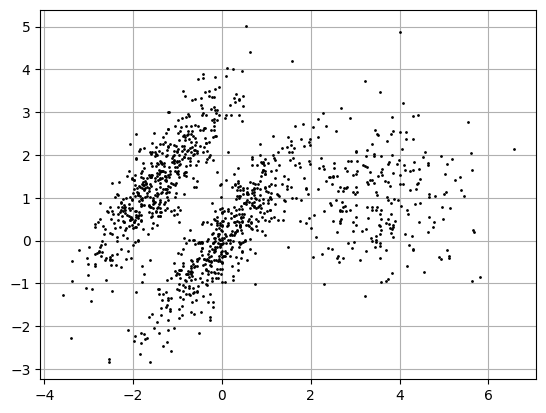

In [151]:
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
plt.grid()
plt.show()

In [153]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [154]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [155]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [156]:
gm.converged_

True

In [157]:
gm.n_iter_

4

In [159]:
label = gm.predict(X)

In [160]:
gm.predict_proba(X).round(3)

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

In [161]:
# This is a generative model, so you can sample new instances from it (and get their labels):

X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [162]:
y_new

array([0, 0, 1, 1, 1, 2])

In [ ]:
gm.score_samples(X).round(2)

# this method is called (probability density function - PDF)
# this is density (mật độ) of the distribution at each point

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

In [164]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

np.float64(0.9999999999225089)

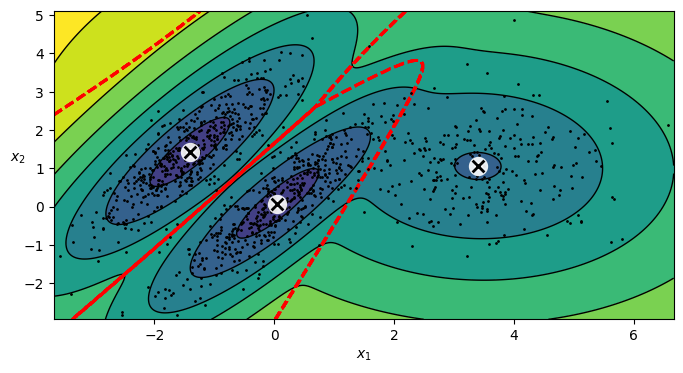

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

# decision boundary is the dashed line

Thuật toán cho ra kết quả khá tốt, vì ta đã sinh bộ dữ liệu theo phân phối Gaussian 2D (tuy nhiên trong thực tế, dữ liệu không phải lúc nào cũng theo kiểu Gauss và ít chiều). Trong bộ dữ liệu này ta cũng có thể thấy được số cụm chính xác. Tuy nhiên khi có nhiều chiều, hoặc nhiều cụm, hoặc ít trường hợp, EM có thể gặp khó khăn khi hội tụ đến giải pháp tối ưu. Bạn có thể cần giảm độ khó của nhiệm vụ bằng cách giới hạn số lượng tham số mà thuật toán phải học.

Một cách để thực hiện điều này là giới hạn phạm vi hình dạng và hướng mà các cụm có thể có. Điều này có thể đạt được bằng cách áp đặt các ràng buộc lên các ma trận hiệp phương sai. Để thực hiện điều này, hãy đặt siêu tham số `covariance_type` thành một trong các giá trị sau:

- **spherical**: tất cả các cụm phải có hình cầu, nhưng chúng có thể có đường kính khác nhau (tức là các phương sai khác nhau).

- **diag**: Các cụm có thể có bất kỳ hình dạng elip nào với bất kỳ kích thước nào, nhưng trục của elip phải song song với trục tọa độ (tức là ma trận hiệp phương sai phải là đường chéo).

- **tied**: Tất cả các cụm phải có cùng hình dạng, kích thước và hướng hình elip (tức là tất cả các cụm đều có cùng ma trận hiệp phương sai).

Theo mặc định, `covariance_type` bằng **full**, nghĩa là mỗi cụm có thể có bất kỳ hình dạng, kích thước và hướng nào (cụm đó có ma trận hiệp phương sai không bị ràng buộc riêng)

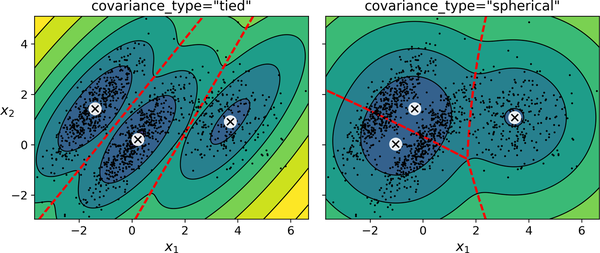
    

**Lưu ý**: độ phức tạp tính toán khi huấn luyện một mô hình GaussianMixture (Mô hình Hỗn hợp Gauss) phụ thuộc vào số lượng mẫu dữ liệu m, số chiều n, số cụm k, và các ràng buộc trên ma trận hiệp phương sai. Nếu covariance_type là "spherical" hoặc "diag", độ phức tạp là $O(knm)$, giả sử dữ liệu có cấu trúc phân cụm. Nếu covariance_type là "tied" hoặc "full", độ phức tạp là $O(kmn^2 + kn^3)$,  vì vậy nó sẽ không thể mở rộng tốt (scale) với số lượng đặc trưng (features) lớn.

## Using Gaussian Mixtures for Anomaly Detection

Việc sử dụng mô hình Gaussian Mixture để phát hiện bất thường khá đơn giản: bất kỳ điểm dữ liệu nào nằm trong vùng có mật độ thấp có thể được xem là bất thường. Chỉ cần xác định ngưỡng mật độ nào bạn muốn sử dụng.

**Ví dụ**: trong một công ty sản xuất cố gắng phát hiện sản phẩm lỗi, tỷ lệ sản phẩm lỗi thường được biết trước — giả sử là 2%. Khi đó bạn đặt ngưỡng mật độ sao cho 2% các điểm nằm trong vùng có mật độ thấp hơn ngưỡng này.

Nếu bạn thấy rằng có quá nhiều false positives (nghĩa là các sản phẩm tốt bị gắn nhãn sai là lỗi), bạn có thể giảm ngưỡng xuống. Ngược lại, nếu có quá nhiều false negatives (sản phẩm lỗi nhưng hệ thống không phát hiện được), bạn có thể tăng ngưỡng lên. Đây là sự đánh đổi precision/recall

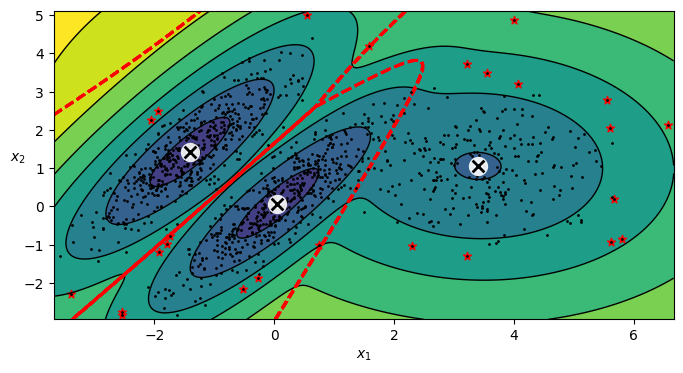

In [168]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]


plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

## Selecting the Number of Clusters

Tương tự `Kmeans`, `GaussianMixture` cũng cần chỉ ra số lượng cụm. 

Với K-means, bạn có thể sử dụng độ lệch quán tính (inertia) hoặc điểm số silhouette để chọn số lượng cụm phù hợp.
Nhưng với Gaussian Mixture, bạn không thể sử dụng các chỉ số này vì chúng không đáng tin cậy khi các cụm không có hình cầu hoặc có kích thước khác nhau.

Thay vào đó, bạn có thể tìm mô hình tối thiểu hóa một tiêu chí thông tin lý thuyết, chẳng hạn như:

- **Tiêu chí thông tin Bayes (BIC - Bayesian Information Criterion)**

- **Tiêu chí thông tin Akaike (AIC - Akaike Information Criterion)**

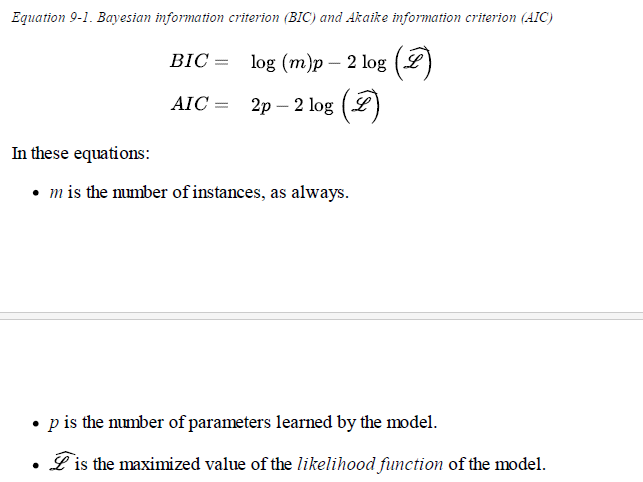

Cả BIC và AIC đều **phạt** các mô hình có nhiều tham số hơn để học (ví dụ: nhiều cụm hơn), và **thưởng** cho các mô hình phù hợp tốt với dữ liệu.

- Thường thì chúng chọn cùng một mô hình.

- Khi khác nhau, mô hình do BIC chọn thường đơn giản hơn (ít tham số hơn) nhưng ít phù hợp với dữ liệu hơn so với mô hình do AIC chọn.

- Điều này đặc biệt đúng với các tập dữ liệu lớn, nơi BIC ưu tiên đơn giản hóa mô hình hơn là tối đa hóa độ khớp.

In [170]:
gm.bic(X)

np.float64(8189.733705221636)

In [171]:
gm.aic(X)

np.float64(8102.508425106598)

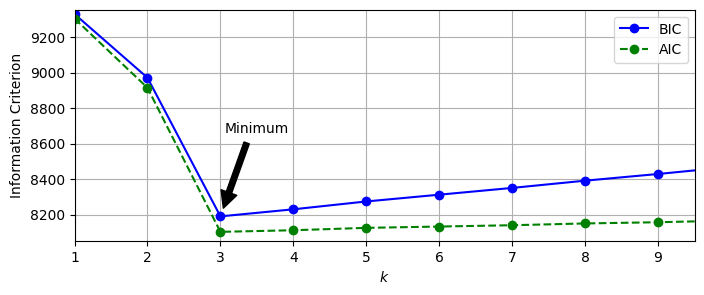

In [174]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()
plt.show()

## Bayesian Gaussian Mixture Models

Thay vì phải tìm kiếm thủ công số lượng cụm tối ưu, bạn có thể sử dụng lớp `BayesianGaussianMixture`, lớp này có khả năng gán trọng số bằng không (hoặc gần bằng) cho những cụm không cần thiết.

Hãy đặt số lượng cụm (n_components) thành một giá trị lớn hơn số lượng cụm tối ưu mà bạn nghĩ là đúng (điều này giả định bạn có một chút kiến thức về bài toán), và thuật toán sẽ tự động loại bỏ những cụm không cần thiết.

In [175]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

c:\Users\Hiep\.conda\envs\data_eng\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

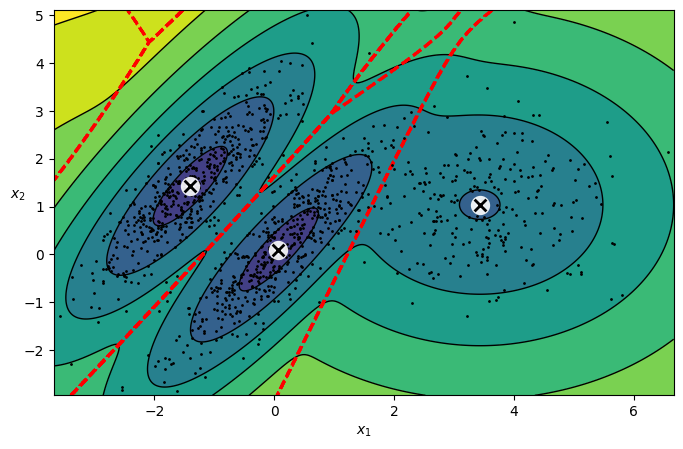

In [176]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

Một lưu ý cuối cùng về GMM: mặc dù chúng hoạt động rất tốt với các cụm có dạng ellipsoid (hình elip), nhưng lại không phù hợp lắm với các cụm có hình dạng khác biệt.

Ví dụ, hãy xem điều gì xảy ra nếu chúng ta dùng mô hình hỗn hợp Gaussian Bayes để phân cụm bộ dữ liệu moons

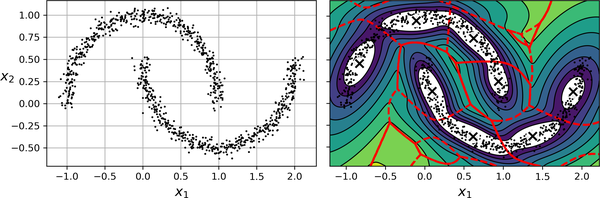

Thuật toán đã cố gắng tìm các ellipsoid, nên nó đã chia dữ liệu thành 8 cụm khác nhau thay vì chỉ có 2 như thực tế. Ước lượng mật độ thì không tệ, do đó mô hình này có thể dùng cho phát hiện bất thường, nhưng lại thất bại trong việc phân biệt two moons.

## Other Algorithms for Anomaly and Novelty Detection

### 1. Fast-MCD (minimum covariance determinant)

Được triển khai bởi lớp EllipticEnvelope, thuật toán này hữu ích để phát hiện ngoại lệ (outlier), đặc biệt để làm sạch một tập dữ liệu. Nó giả định rằng các điểm bình thường (inlier) được tạo ra từ một phân phối Gaussian duy nhất (không phải hỗn hợp). Nó cũng giả định rằng tập dữ liệu bị nhiễm bởi các ngoại lệ không đến từ phân phối Gaussian này.

Khi thuật toán ước lượng các tham số của phân phối Gaussian (tức là hình dạng của elip bao quanh các điểm bình thường), nó sẽ bỏ qua những điểm có khả năng cao là bất thường. Kỹ thuật này giúp ước lượng elip chính xác hơn và do đó giúp thuật toán phát hiện ngoại lệ tốt hơn.

### 2. Isolation forest

Đây là một thuật toán hiệu quả để phát hiện ngoại lệ, đặc biệt là trong các tập dữ liệu có số chiều lớn.

Thuật toán này xây dựng một rừng ngẫu nhiên, trong đó mỗi cây quyết định (decision tree) được tạo ngẫu nhiên: tại mỗi nút, nó chọn một đặc trưng ngẫu nhiên, sau đó chọn một ngưỡng ngẫu nhiên (giữa giá trị nhỏ nhất và lớn nhất) để chia tập dữ liệu ra làm hai.

Dữ liệu dần dần bị cắt nhỏ theo cách này, cho đến khi tất cả các điểm bị cô lập khỏi nhau. Các điểm bất thường thường cách xa các điểm khác, nên chúng bị cô lập sau ít bước hơn (tức là sau ít lần chia hơn) so với các điểm bình thường.

### 3. Local outlier factor (LOF)

Thuật toán này cũng rất tốt để phát hiện ngoại lệ. Nó so sánh mật độ của một điểm với mật độ của các điểm lân cận.

Một điểm được xem là bất thường nếu nó cách xa hơn so với các điểm gần nhất (k-nearest neighbors).

### 4. One-class SVM

Thuật toán này phù hợp hơn cho phát hiện mới lạ (novelty detection).

Nhớ rằng một bộ phân loại SVM dạng kernel phân biệt hai lớp bằng cách chiếu các điểm vào không gian chiều cao, sau đó phân tách chúng bằng một siêu phẳng tuyến tính.

Với one-class SVM, chúng ta chỉ có một lớp duy nhất (các điểm bình thường), nên nó sẽ cố gắng tách toàn bộ điểm bình thường ra xa khỏi gốc tọa độ trong không gian chiều cao. Bất kỳ điểm nào không nằm trong vùng này sẽ bị coi là bất thường.

Lưu ý: Có nhiều siêu tham số cần điều chỉnh. Mô hình hoạt động tốt với tập dữ liệu nhỏ hoặc trung bình, nhưng không phù hợp với tập lớn vì SVM không mở rộng tốt.

### 5. PCA and other dimensionality reduction techniques with an inverse_transform() method

Nếu bạn so sánh lỗi tái tạo (reconstruction error) của một điểm bình thường với lỗi tái tạo của điểm bất thường, thì lỗi của điểm bất thường sẽ thường lớn hơn rất nhiều.

Đây là một phương pháp đơn giản và hiệu quả để phát hiện bất thường (xem bài tập cuối chương để hiểu thêm).



# Exercises

## 10

**Question: The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. Forty different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?**

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Hiep\scikit_learn_data


In [2]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [7]:
from sklearn.decomposition import PCA

# to speed up
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

print(X_train_pca.shape, y_train.shape)
print(X_valid_pca.shape, y_valid.shape)
print(X_test_pca.shape, y_test.shape)

(280, 199) (280,)
(80, 199) (80,)
(40, 199) (40,)


In [8]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    # print(f"k={k}")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

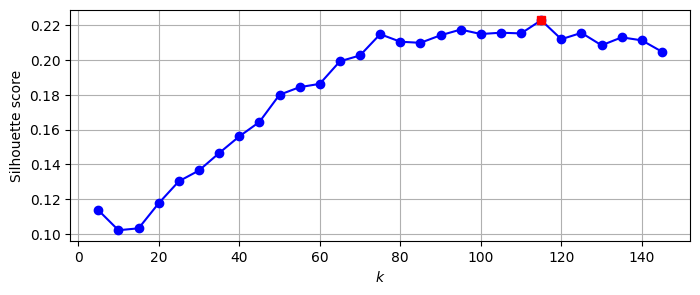

In [11]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

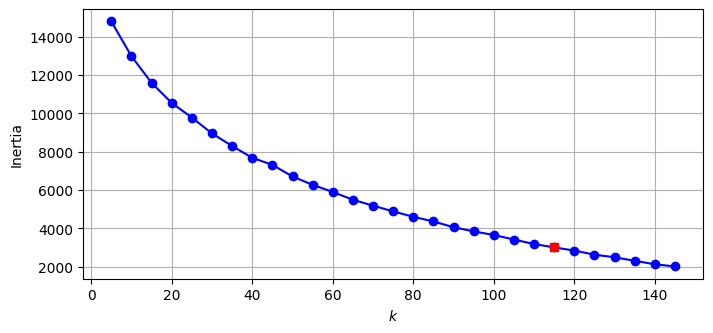

In [12]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

In [13]:
best_model = kmeans_per_k[best_index]

Cluster 0


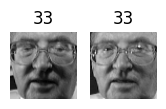

Cluster 1


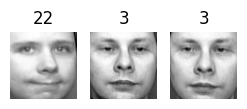

Cluster 2


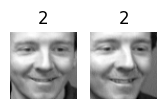

Cluster 3


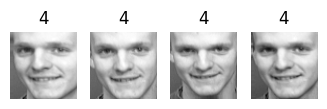

Cluster 4


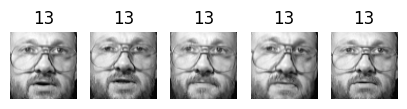

Cluster 5


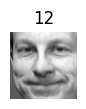

Cluster 6


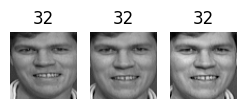

Cluster 7


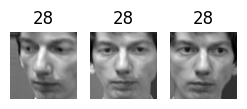

Cluster 8


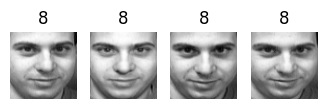

Cluster 9


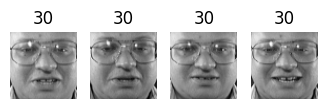

Cluster 10


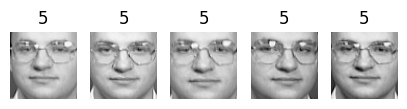

In [14]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()


cnt = 0
for cluster_id in np.unique(best_model.labels_):
    if cnt > 10:
        break
    cnt += 1
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## 11

**Question: Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?**

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9375

In [18]:
# use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.

X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.7125

In [20]:
from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.4875
15 0.5875
20 0.6125
25 0.6375
30 0.6125
35 0.7125
40 0.6875
45 0.7375
50 0.725
55 0.725
60 0.725
65 0.7
70 0.7125
75 0.7375
80 0.7625
85 0.7
90 0.75
95 0.75
100 0.75
105 0.7625
110 0.75
115 0.7125
120 0.7875
125 0.7625
130 0.75
135 0.7625
140 0.7125
145 0.725


In [21]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [22]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8

Kết quả không được tốt lắm. Các cụm không hữu ích để đào tạo trực tiếp trong trường hợp này

## 12

**Question: Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).**

In [23]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [25]:
# generate new face using sample() method
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

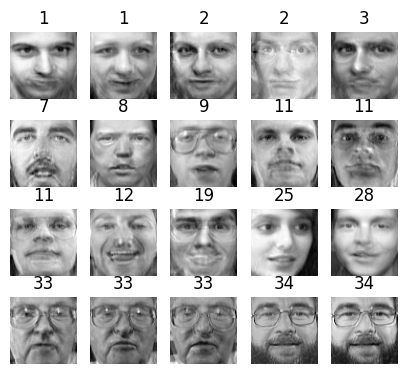

In [26]:
plot_faces(gen_faces, y_gen_faces)

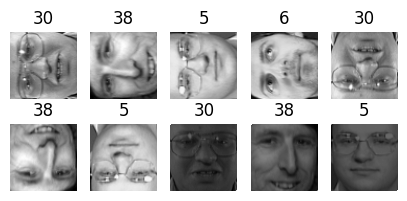

In [27]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [30]:
X_bad_faces_pca = pca.transform(X_bad_faces)
gm.score_samples(X_bad_faces_pca)

array([-1.85962730e+07, -1.73014028e+07, -4.15206284e+07, -4.81260106e+07,
       -3.20479138e+07, -1.35426801e+07, -2.92373652e+07, -9.25150231e+07,
       -1.03272442e+08, -5.41697486e+07])

Các khuôn mặt mới được sinh đều bị mô hình Gaussian Mixture Model phát hiện là ngoại lai. Điểm số rất thấp

In [31]:
gm.score_samples(X_train_pca[:10])

array([1163.02020907, 1112.17308404, 1156.32132845, 1170.67602902,
       1073.69246215, 1139.89252813, 1113.76629931, 1073.69244975,
       1048.17522825, 1048.17520709])

## 13

**Question: Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise and look at their reconstruction error: notice how much larger it is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.**

In [32]:
X_train_pca.round(2)

array([[ -3.78,   1.85,  -5.14, ...,   0.14,  -0.21,   0.06],
       [-10.15,   1.53,  -0.77, ...,  -0.12,  -0.14,  -0.02],
       [ 10.02,  -2.88,  -0.92, ...,  -0.07,  -0.  ,   0.12],
       ...,
       [ -2.48,  -2.96,   1.3 , ...,   0.02,   0.03,  -0.15],
       [  3.22,  -5.35,   1.39, ...,  -0.06,  -0.23,   0.16],
       [  0.92,   3.65,   2.26, ...,  -0.14,  -0.07,   0.06]],
      dtype=float32)

In [33]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [34]:
reconstruction_errors(pca, X_train).mean()

np.float32(0.0001920535)

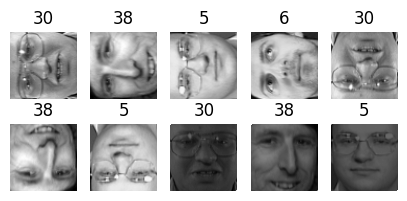

In [35]:
plot_faces(X_bad_faces, y_bad)

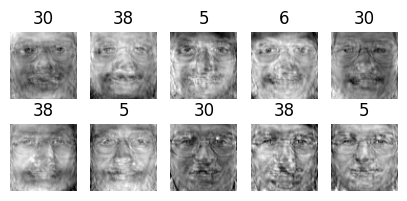

In [36]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)